In [37]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso, Ridge
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
df=pd.read_csv("/content/Microbiota_composition.csv")

In [39]:
#Basic stats
print ("Number of rows: {}".format(df.shape[0]))
print ("Number of columns: {}".format(df.shape[1]))
print()

print ("Display of dataset: ")
display(df.head())
print()
print()

print ("Basics statistics: ")
df_desc= df.describe(include="all")
display(df_desc)
print()

print ("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows: 768
Number of columns: 852

Display of dataset: 


Unnamed: 0 condition  Streptococcus_anginosus___ref_mOTU_v2_0004__  \
0           0   control                                      0.000000   
1           1   control                                      0.000591   
2           2   control                                      0.000840   
3           3   control                                      0.000000   
4           4   control                                      0.000085   

   Enterobacteriaceae_sp.___ref_mOTU_v2_0036__  \
0                                     0.000000   
1                                     0.000066   
2                                     0.000065   
3                                     0.000071   
4                                     0.019236   

   Citrobacter_sp.___ref_mOTU_v2_0076__  \
0                              0.000000   
1                              0.000000   
2                              0.002454   
3                              0.000000   
4                              0.001111   

   Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__  \
0                                           0.000000       
1                                           0.000000       
2                                           0.000000       
3                                           0.000000       
4                                           0.000256       

   Enterococcus_faecalis___ref_mOTU_v2_0116__  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000065   
3                                    0.000000   
4                                    0.000085   

   Lactobacillus_salivarius___ref_mOTU_v2_0125__  \
0                                       0.000000   
1                                       0.000000   
2                                       0.013111   
3                                       0.000000   
4                                       0.000085   

   Dielma_fastidiosa___ref_mOTU_v2_0138__  \
0                                0.000083   
1                                0.000000   
2                                0.000000   
3                                0.000213   
4                                0.000000   

   Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__  ...  \
0                                           0.000000            ...   
1                                           0.000066            ...   
2                                           0.000065            ...   
3                                           0.000071            ...   
4                                           0.000000            ...   

   unknown_Clostridiales___meta_mOTU_v2_7778__  \
0                                     0.000000   
1                                     0.000000   
2                                     0.000000   
3                                     0.000000   
4                                     0.000171   

   unknown_Clostridiales___meta_mOTU_v2_7781__  \
0                                     0.000000   
1                                     0.000000   
2                                     0.000194   
3                                     0.000000   
4                                     0.000000   

   unknown_Clostridiales___meta_mOTU_v2_7782__  \
0                                     0.000000   
1                                     0.000788   
2                                     0.000065   
3                                     0.000000   
4                                     0.000000   

   unknown_Clostridiales___meta_mOTU_v2_7784__  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Clostridium_sp._CAG__230___meta_mOTU_v2_7788__  \
0                                         0.00000   
1                          



Basics statistics: 


Unnamed: 0 condition  Streptococcus_anginosus___ref_mOTU_v2_0004__  \
count   768.000000       768                                    768.000000   
unique         NaN         2                                           NaN   
top            NaN       CRC                                           NaN   
freq           NaN       386                                           NaN   
mean     51.118490       NaN                                      0.000093   
std      32.725922       NaN                                      0.000442   
min       0.000000       NaN                                      0.000000   
25%      23.750000       NaN                                      0.000000   
50%      47.500000       NaN                                      0.000000   
75%      77.000000       NaN                                      0.000064   
max     127.000000       NaN                                      0.008120   

        Enterobacteriaceae_sp.___ref_mOTU_v2_0036__  \
count                                    768.000000   
unique                                          NaN   
top                                             NaN   
freq                                            NaN   
mean                                       0.017398   
std                                        0.067998   
min                                        0.000000   
25%                                        0.000105   
50%                                        0.000653   
75%                                        0.004793   
max                                        0.774361   

        Citrobacter_sp.___ref_mOTU_v2_0076__  \
count                             768.000000   
unique                                   NaN   
top                                      NaN   
freq                                     NaN   
mean                                0.000467   
std                                 0.005845   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 0.134017   

        Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__  \
count                                          768.000000       
unique                                                NaN       
top                                                   NaN       
freq                                                  NaN       
mean                                             0.000561       
std                                              0.005987       
min                                              0.000000       
25%                                              0.000000       
50%                                              0.000000       
75%                                              0.000000       
max                                              0.113759       

        Enterococcus_faecalis___ref_mOTU_v2_0116__  \
count                                   768.000000   
unique                                         NaN   
top                                            NaN   
freq                                           NaN   
mean                                      0.000256   
std                                       0.002036   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       0.000000   
max                                       0.045770   

        Lactobacillus_salivarius___ref_mOTU_v2_0125__  \
count                                      768.000000   
unique                                            NaN   
top                                               NaN   
freq                                              NaN   
mean                                         0.000173   
std                                          0.001434   
min 


Percentage of missing values: 


Unnamed: 0                                           0.0
condition                                            0.0
Streptococcus_anginosus___ref_mOTU_v2_0004__         0.0
Enterobacteriaceae_sp.___ref_mOTU_v2_0036__          0.0
Citrobacter_sp.___ref_mOTU_v2_0076__                 0.0
                                                    ... 
Clostridium_sp._CAG__1193___meta_mOTU_v2_7789__      0.0
unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__    0.0
unknown_Clostridiales___meta_mOTU_v2_7795__          0.0
unknown_Clostridiales___meta_mOTU_v2_7800__          0.0
country                                              0.0
Length: 852, dtype: float64

In [40]:
print("The following will be 'False' if there's no missing values in the df: ", df.isnull().any().any())

The following will be 'False' if there's no missing values in the df:  False


In [41]:
#mapping condition into 0 or 1
mapping = {"CRC": 1, "control": 0}
df['condition'] = df['condition'].map(mapping)
df.head()

Unnamed: 0  condition  Streptococcus_anginosus___ref_mOTU_v2_0004__  \
0           0          0                                      0.000000   
1           1          0                                      0.000591   
2           2          0                                      0.000840   
3           3          0                                      0.000000   
4           4          0                                      0.000085   

   Enterobacteriaceae_sp.___ref_mOTU_v2_0036__  \
0                                     0.000000   
1                                     0.000066   
2                                     0.000065   
3                                     0.000071   
4                                     0.019236   

   Citrobacter_sp.___ref_mOTU_v2_0076__  \
0                              0.000000   
1                              0.000000   
2                              0.002454   
3                              0.000000   
4                              0.001111   

   Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__  \
0                                           0.000000       
1                                           0.000000       
2                                           0.000000       
3                                           0.000000       
4                                           0.000256       

   Enterococcus_faecalis___ref_mOTU_v2_0116__  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000065   
3                                    0.000000   
4                                    0.000085   

   Lactobacillus_salivarius___ref_mOTU_v2_0125__  \
0                                       0.000000   
1                                       0.000000   
2                                       0.013111   
3                                       0.000000   
4                                       0.000085   

   Dielma_fastidiosa___ref_mOTU_v2_0138__  \
0                                0.000083   
1                                0.000000   
2                                0.000000   
3                                0.000213   
4                                0.000000   

   Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__  ...  \
0                                           0.000000            ...   
1                                           0.000066            ...   
2                                           0.000065            ...   
3                                           0.000071            ...   
4                                           0.000000            ...   

   unknown_Clostridiales___meta_mOTU_v2_7778__  \
0                                     0.000000   
1                                     0.000000   
2                                     0.000000   
3                                     0.000000   
4                                     0.000171   

   unknown_Clostridiales___meta_mOTU_v2_7781__  \
0                                     0.000000   
1                                     0.000000   
2                                     0.000194   
3                                     0.000000   
4                                     0.000000   

   unknown_Clostridiales___meta_mOTU_v2_7782__  \
0                                     0.000000   
1                                     0.000788   
2                                     0.000065   
3                                     0.000000   
4                                     0.000000   

   unknown_Clostridiales___meta_mOTU_v2_7784__  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Clostridium_sp._CAG__230___meta_mOTU_v2_7788__  \
0                                         0.00000   
1                    

In [42]:
# Calcul de la matrice de corrélation
correlation_matrix = df.corr()

# Select the top 426 features according to their caracteristics with "condition"
top_feature_names = correlation_matrix["condition"].abs().nlargest(426).index

# Display the 426 top features
correlations = correlation_matrix.loc[top_feature_names, "condition"].abs().sort_values(ascending=False)
print(correlations)


df2= df[top_feature_names]



<ipython-input-42-8cf12e2cb516>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


condition                                            1.000000
unknown_Dialister___meta_mOTU_v2_5867__              0.221484
unknown_Tyzzerella___meta_mOTU_v2_5947__             0.202579
Ruminococcus_torques___ref_mOTU_v2_1376__            0.201149
Gemella_morbillorum___ref_mOTU_v2_4513__             0.191644
                                                       ...   
unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__    0.043585
unknown_Firmicutes___meta_mOTU_v2_7755__             0.043563
unknown_Clostridiales___meta_mOTU_v2_5569__          0.043352
Lactococcus_lactis___ref_mOTU_v2_0182__              0.043339
Fusobacterium_gonidiaformans___ref_mOTU_v2_1404__    0.043123
Name: condition, Length: 426, dtype: float64


<ipython-input-43-63d085532c6d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")


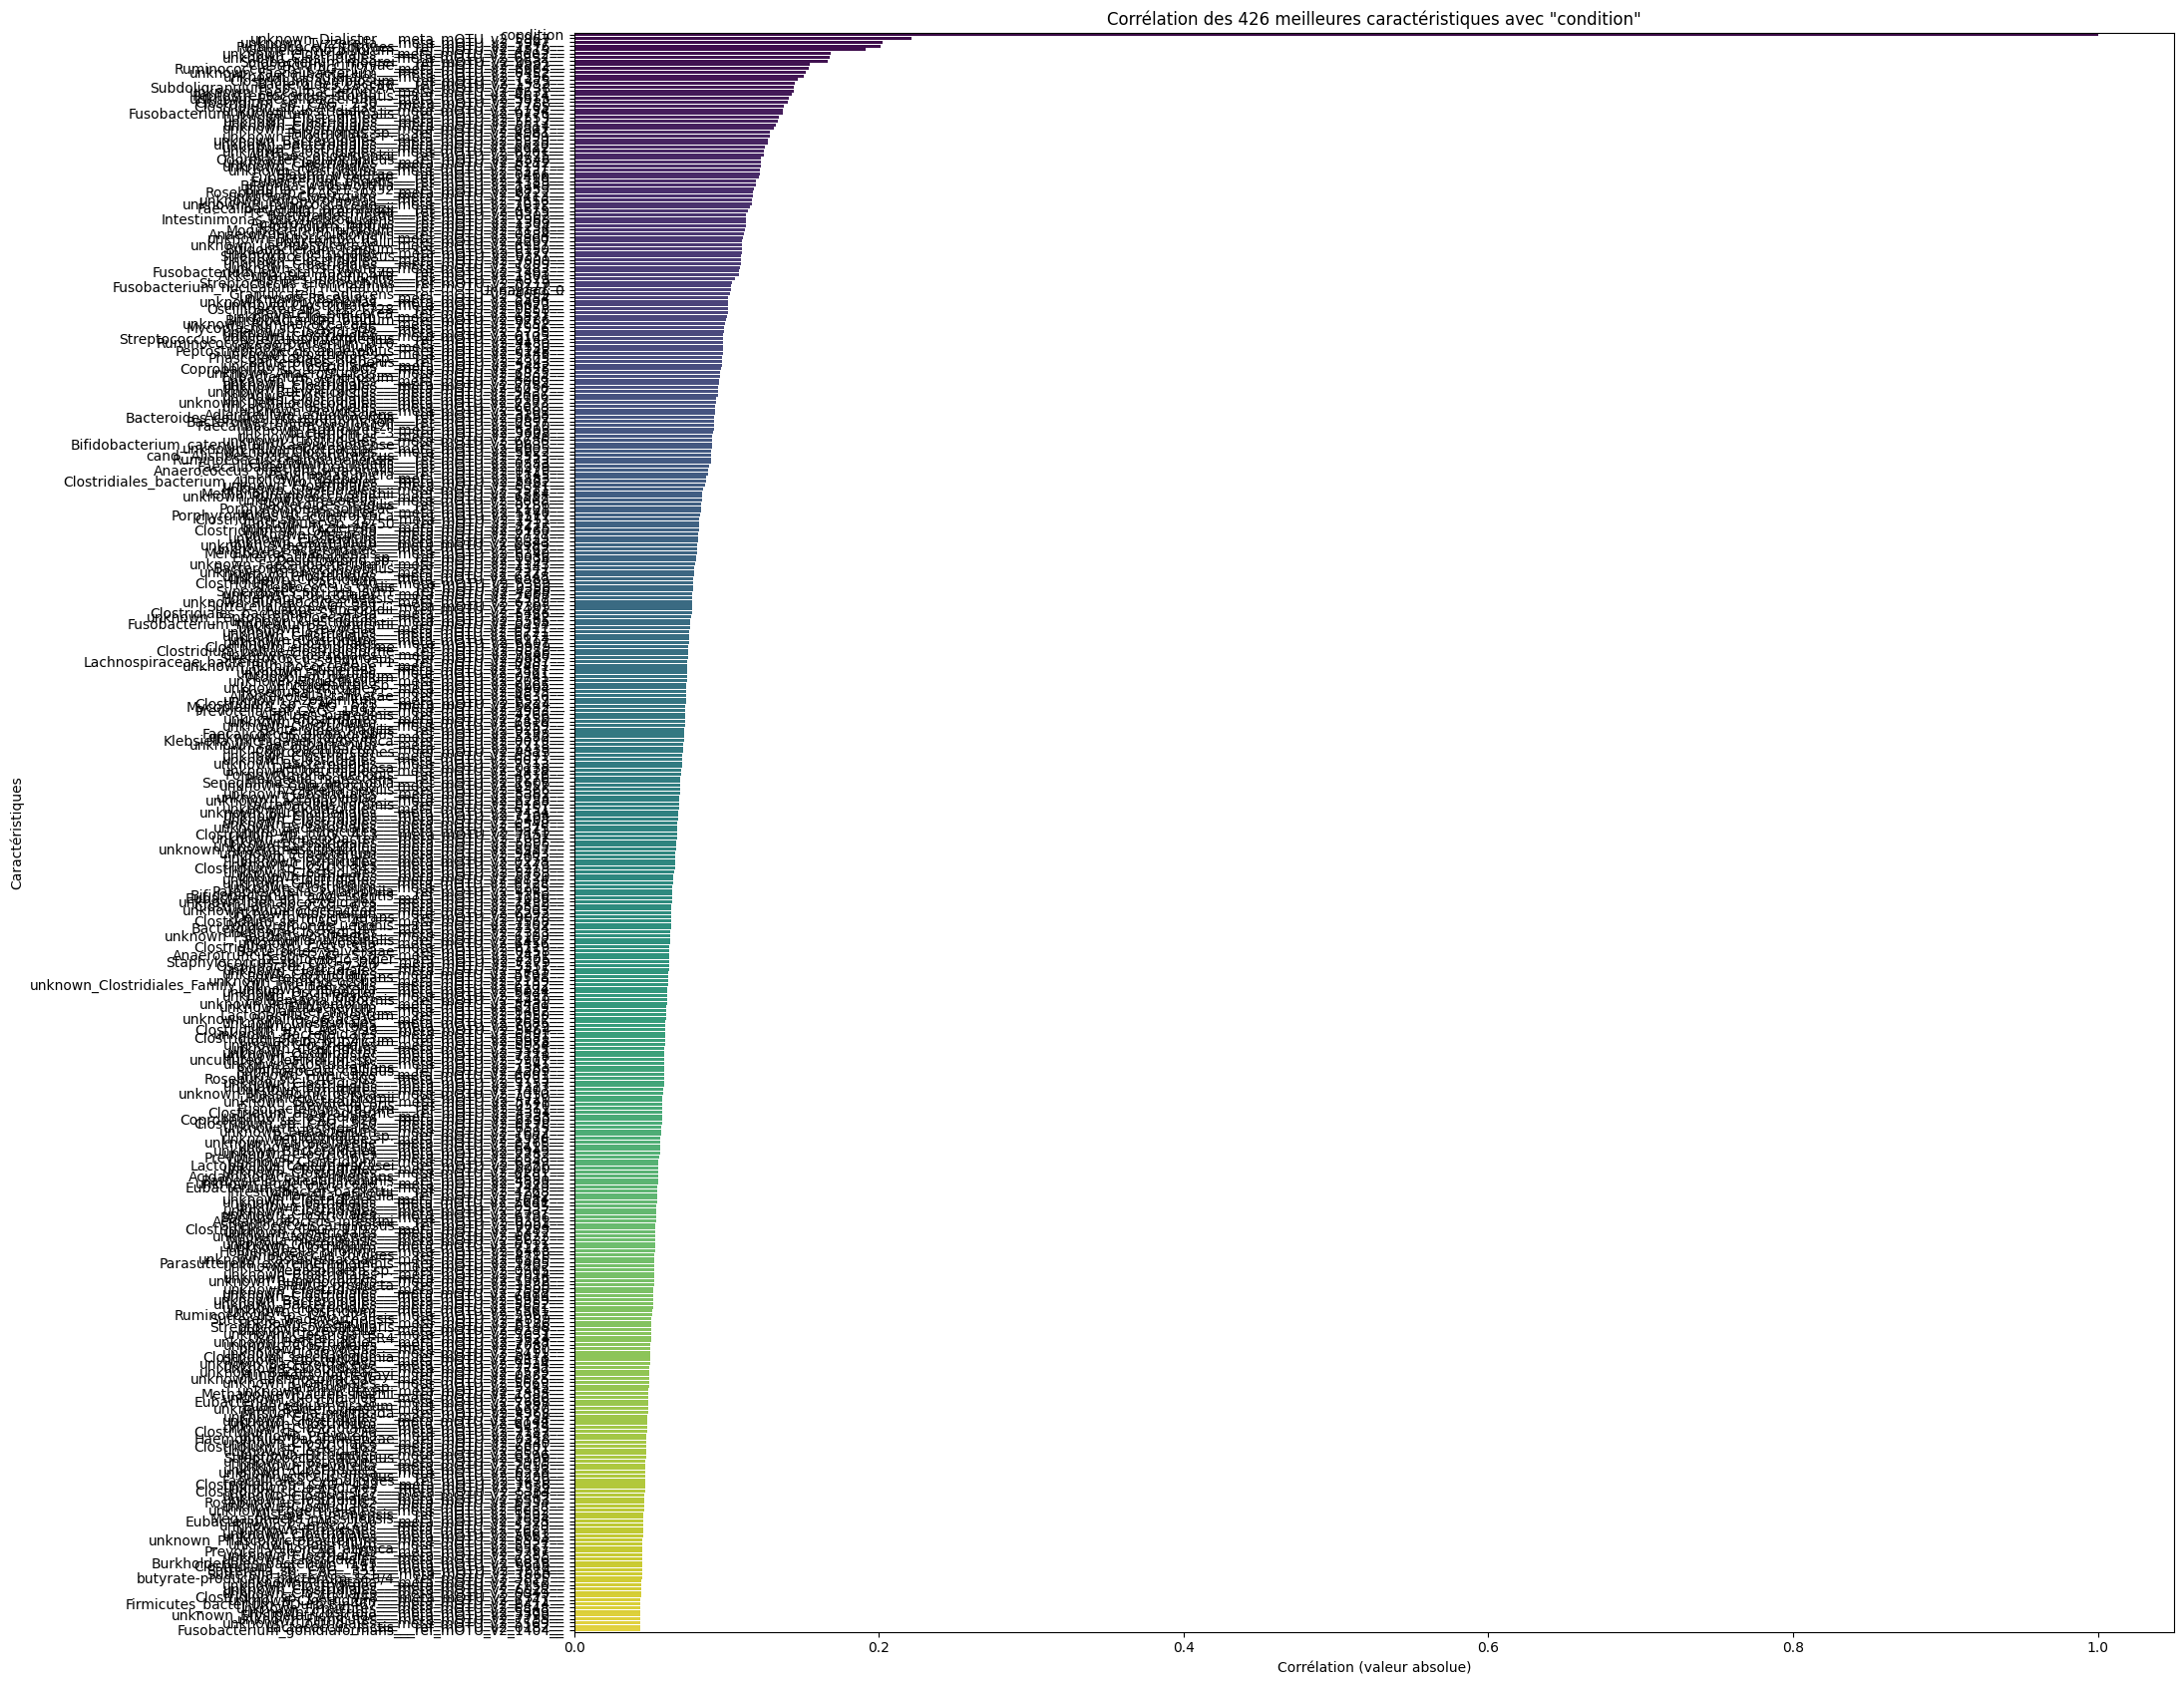

In [43]:
# Création d'un graphique à barres pour afficher les corrélations
plt.figure(figsize=(22, 17))
sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")
plt.xlabel('Corrélation (valeur absolue)')
plt.ylabel('Caractéristiques')
plt.title('Corrélation des 426 meilleures caractéristiques avec "condition"')
plt.tight_layout()
plt.show()

In [44]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "condition"

X = df2.drop(target_variable, axis = 1)
Y = df2.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    0
1    0
2    0
3    0
4    0
Name: condition, dtype: int64

X :
   unknown_Dialister___meta_mOTU_v2_5867__  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   unknown_Tyzzerella___meta_mOTU_v2_5947__  \
0                                  0.000166   
1                                  0.000000   
2                                  0.000000   
3                                  0.000071   
4                                  0.000085   

   Ruminococcus_torques___ref_mOTU_v2_1376__  \
0                                   0.001162   
1                                   0.019440   
2                                   0.000065   
3                                   0.000071   
4                                   0.033085   

   Gemella_morbillorum___ref_mO

In [45]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['unknown_Dialister___meta_mOTU_v2_5867__', 'unknown_Tyzzerella___meta_mOTU_v2_5947__', 'Ruminococcus_torques___ref_mOTU_v2_1376__', 'Gemella_morbillorum___ref_mOTU_v2_4513__', 'unknown_Clostridiales___meta_mOTU_v2_6602__', 'unknown_Clostridiales___meta_mOTU_v2_6852__', 'Solobacterium_moorei___ref_mOTU_v2_0531__', 'Clostridium_citroniae___ref_mOTU_v2_4882__', 'Ruminococcus_sp._CAG__177___meta_mOTU_v2_6664__', 'unknown_Faecalibacterium___meta_mOTU_v2_6452__', 'unknown_Clostridiales___meta_mOTU_v2_7356__', 'Clostridium_symbiosum___ref_mOTU_v2_1475__', 'Bacteroides_caccae___ref_mOTU_v2_1382__', 'Subdoligranulum_sp._4_3_54A2FAA___ref_mOTU_v2_4738__', 'unknown_Faecalibacterium___meta_mOTU_v2_6631__', 'Peptostreptococcus_stomatis___ref_mOTU_v2_4614__', 'unknown_Faecalibacterium___meta_mOTU_v2_5815__', 'Clostridium_sp._CAG__230___meta_mOTU_v2_7788__', 'Clostridium_sp._CAG__138___meta_mOTU_v2_7765__', 'unknown_Clostridiales___meta_mOTU_v2_6134__', 'Fusobacterium_nucleat

<ipython-input-45-0f0a515c43b5>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,t in X.dtypes.iteritems():


In [46]:
#Divide dataset Train set & Test set
print("Dividing intro train and test sets ...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify = Y)
print("...Done.")
print()

Dividing intro train and test sets ...
...Done.



Preprocessing

In [47]:
#Create pipeline for numeric features
numeric_tansformer = Pipeline(steps=[

    ("scaler", StandardScaler())
])

In [48]:
#Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_tansformer, numeric_features)
    ]
)

In [49]:
#Preprocessings on train set
print("performing preprocessings on train set ...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print("...Done.")
print(X_train[0:5]) # numpy array
print()

# Label encoding
print("Encoding labels....")
print (Y_train.head())
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("...Done.")
print(Y_train[0:5])

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

# Label encoding
print("Encoding labels...")
print(Y_test[0:5])
Y_test = encoder.transform(Y_test)
print("...Done")
print(Y_test[0:5])

performing preprocessings on train set ...
     unknown_Dialister___meta_mOTU_v2_5867__  \
75                                       0.0   
252                                      0.0   
69                                       0.0   
531                                      0.0   
384                                      0.0   

     unknown_Tyzzerella___meta_mOTU_v2_5947__  \
75                                   0.000000   
252                                  0.000000   
69                                   0.000094   
531                                  0.000000   
384                                  0.000000   

     Ruminococcus_torques___ref_mOTU_v2_1376__  \
75                                    0.003740   
252                                   0.000075   
69                                    0.000283   
531                                   0.000000   
384                                   0.000063   

     Gemella_morbillorum___ref_mOTU_v2_4513__  \
75                     

Random Forest

In [50]:
# Perform grid search
print("Grid search...")
classifier = RandomForestClassifier()

# Grid of values to be tested
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [10, 20, 40, 60, 80, 100]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 2, verbose = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
Fitting 2 folds for each of 270 candidates, totalling 540 fits
[CV 1/2] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.707 total time=   0.0s
[CV 2/2] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.739 total time=   0.0s
[CV 1/2] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.746 total time=   0.1s
[CV 2/2] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.772 total time=   0.1s
[CV 1/2] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.694 total time=   0.1s
[CV 2/2] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.743 total time=   0.1s
[CV 1/2] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.713 total time=   0.1s
[CV 2/2] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.756 total time=  

In [51]:
X_train.shape[1]

425

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Utiliser les meilleurs hyperparamètres trouvés lors de la Grid Search
best_hyperparameters = gridsearch.best_params_
best_classifier = RandomForestClassifier(**best_hyperparameters)

# Entraîner le modèle avec les données d'entraînement
best_classifier.fit(X_train, Y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=60)

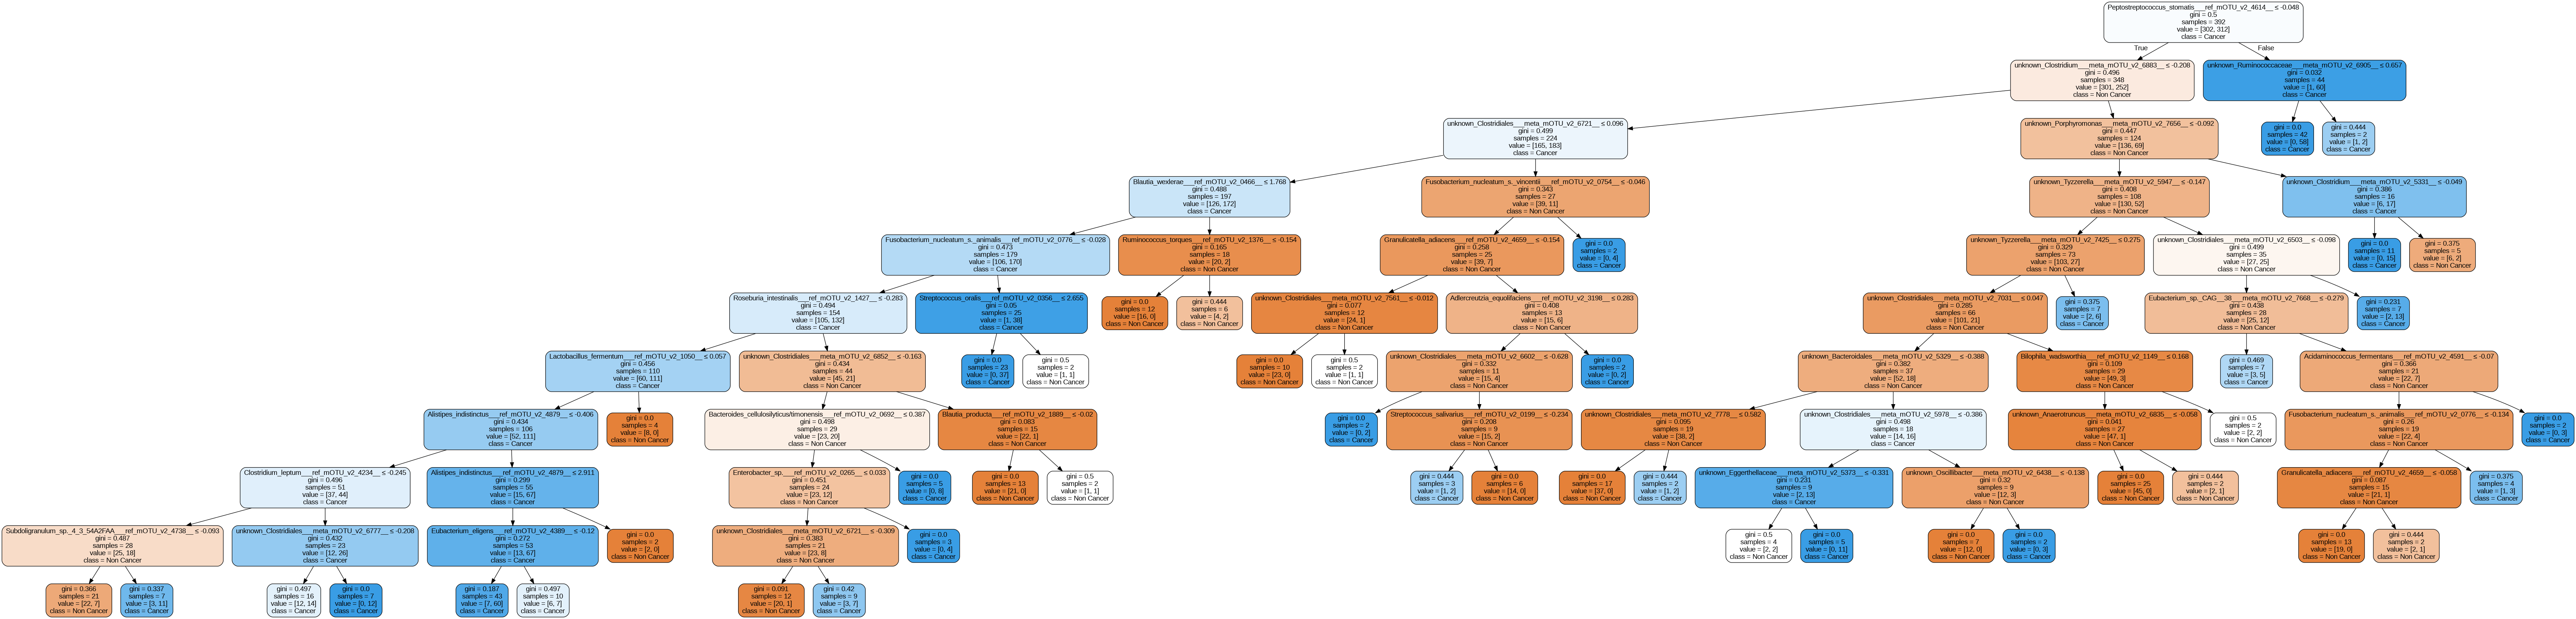

In [53]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Sélectionner un arbre individuel à partir de notre modèle Random Forest
selected_tree = best_classifier.estimators_[0]

# Sélectionnez les noms des 34 meilleures caractéristiques
feature_names = top_feature_names.drop("condition")

# Exportez l'arbre au format DOT
dot_data = export_graphviz(
    selected_tree,
    out_file=None,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_names,
    class_names=['Non Cancer', 'Cancer']
)

# Créer un objet graphviz
graph = graphviz.Source(dot_data)

# Afficher l'arbre directement dans le notebook
Image(graph.pipe(format='png'))


In [54]:
len(feature_names)

425

Performances

In [55]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0
 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1
 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0
 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0
 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0
 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1
 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1
 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0

In [56]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1
 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1
 0 0 0 1 1 0]

Probabilities on test set...
...Done.
[[0.46355347 0.53644653]
 [0.40276184 0.59723816]
 [0.55158201 0.44841799]
 [0.88156532 0.11843468]
 [0.74482883 0.25517117]
 [0.85199535 0.14800465]
 [0.55311599 0.44688401]
 [0.72365647 0.27634353]
 [0.48115939 0.51884061]
 [0.28205032 0.71794968]
 [0.53626709 0.46373291]
 [0.73604271 0.26395729]
 [0.56919853 0.43080147]
 [0.21792534 0.78207466]
 [0.56321396 0.43678604]
 [0.8207465  0.1792535 ]
 [0.37545567 0.62454433]
 [0.08493889 0.91506111]
 [0.80621728 0.19378272]
 [0.08260514 0.91739486]
 [0.53132089 0.46867911]
 [0.4631159  0.5368841 ]
 [0.56607086 0.43392914]
 [0.39476274 0.60523726]
 [0.8052386

In [57]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

accuracy on training set :  0.9820846905537459
accuracy on test set :  0.7467532467532467

f1-score on training set :  0.9820554649265906
f1-score on test set :  0.7234042553191489



In [58]:
# Perform 5-fold cross-validation to evaluate the generalized accuracy score obtained with a cross validation
print("5-fold cross-validation...")
regressor = RandomForestClassifier()
scores = cross_val_score(regressor, X_train, Y_train, cv=5, scoring = "accuracy")
print(scores)
print('The cross-validated accuracy is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...
[0.7398374  0.7804878  0.74796748 0.82926829 0.71311475]
The cross-validated accuracy is :  0.7621351459416233
The standard deviation is :  0.0398612358361642


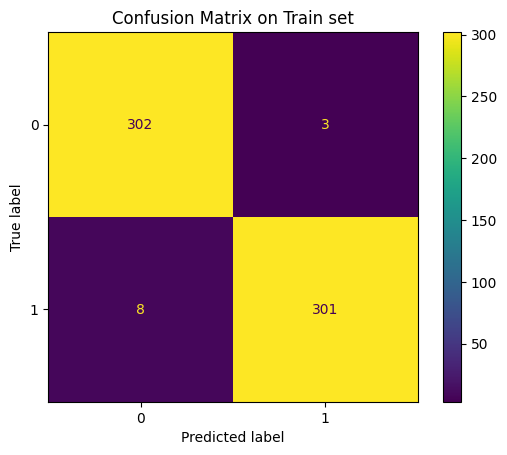

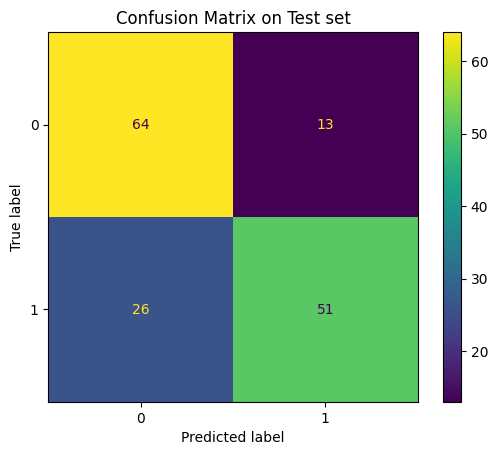

In [59]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

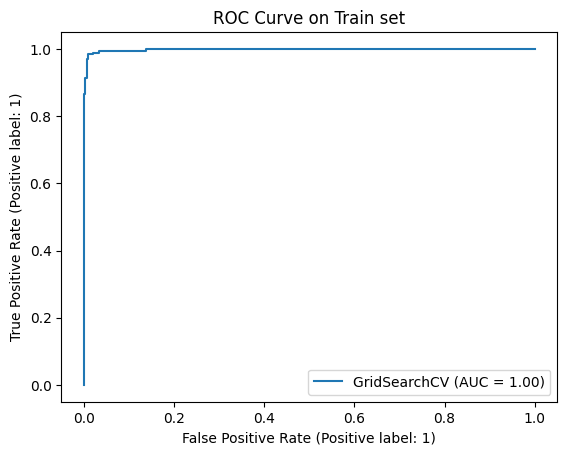

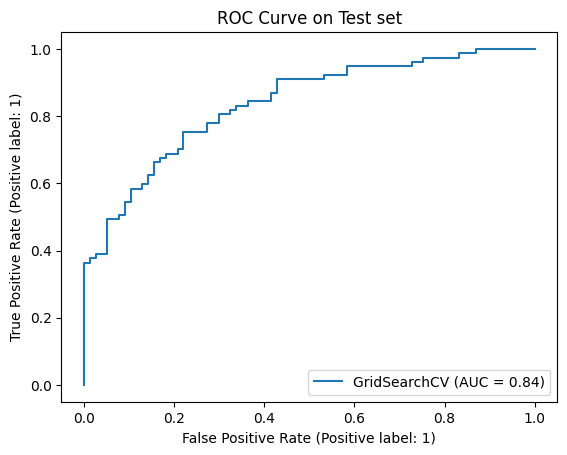

In [60]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(gridsearch, X_train, Y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(gridsearch, X_test, Y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

In [61]:
column_names = []
for name, step, features_list in preprocessor.transformers_: # loop over steps of ColumnTransformer
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = step.get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names

print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['unknown_Dialister___meta_mOTU_v2_5867__', 'unknown_Tyzzerella___meta_mOTU_v2_5947__', 'Ruminococcus_torques___ref_mOTU_v2_1376__', 'Gemella_morbillorum___ref_mOTU_v2_4513__', 'unknown_Clostridiales___meta_mOTU_v2_6602__', 'unknown_Clostridiales___meta_mOTU_v2_6852__', 'Solobacterium_moorei___ref_mOTU_v2_0531__', 'Clostridium_citroniae___ref_mOTU_v2_4882__', 'Ruminococcus_sp._CAG__177___meta_mOTU_v2_6664__', 'unknown_Faecalibacterium___meta_mOTU_v2_6452__', 'unknown_Clostridiales___meta_mOTU_v2_7356__', 'Clostridium_symbiosum___ref_mOTU_v2_1475__', 'Bacteroides_caccae___ref_mOTU_v2_1382__', 'Subdoligranulum_sp._4_3_54A2FAA___ref_mOTU_v2_4738__', 'unknown_Faecalibacterium___meta_mOTU_v2_6631__', 'Peptostreptococcus_stomatis___ref_mOTU_v2_4614__', 'unknown_Faecalibacterium___meta_mOTU_v2_5815__', 'Clostridium_sp._CAG__230___meta_mOTU_v2_7788__', 'Clostridium_sp._CAG__138___meta_mOTU_v2_7765__', 'unknown_Clostridiales___meta_mOTU_v2_61

In [62]:
# Create a pandas DataFrame
feature_importance = pd.DataFrame(index = column_names, data = gridsearch.best_estimator_.feature_importances_, columns=["feature_importances"])
feature_importance = feature_importance.sort_values(by = 'feature_importances')


In [80]:
# Tri du DataFrame par ordre décroissant d'importance
feature_importance = feature_importance.sort_values(by='feature_importances', ascending=False)

# Création d'un graphique à barres
plt.figure(figsize=(200, 160))
plt.barh(feature_importance.index, feature_importance['feature_importances'], color='skyblue')
plt.xlabel('Importance des Caractéristiques')
plt.ylabel('Caractéristiques')
plt.title('Importance des Caractéristiques')
plt.gca().invert_yaxis()  # Inverser l'axe y pour afficher les caractéristiques les plus importantes en haut
plt.tight_layout()
plt.show()